<a href="https://colab.research.google.com/github/nfahrisalim/DS_Collection/blob/main/SimpleLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library & Read Data

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
# Read data
df = pd.read_csv('/content/Data.csv')

In [ ]:
# Show data table
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


# Data Preprocessing

In [ ]:
# Info DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [ ]:
# Statistik deskriptif
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [ ]:
# CCheck Null
df.isnull().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [ ]:
# Check duplikat
duplicate_rows = df.duplicated()
duplicate_rows.sum()

0

In [ ]:
# Hapus kolom gak guna
df = df.drop(columns='Unnamed: 0')

In [ ]:
df.head(5)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


# Data Visualization

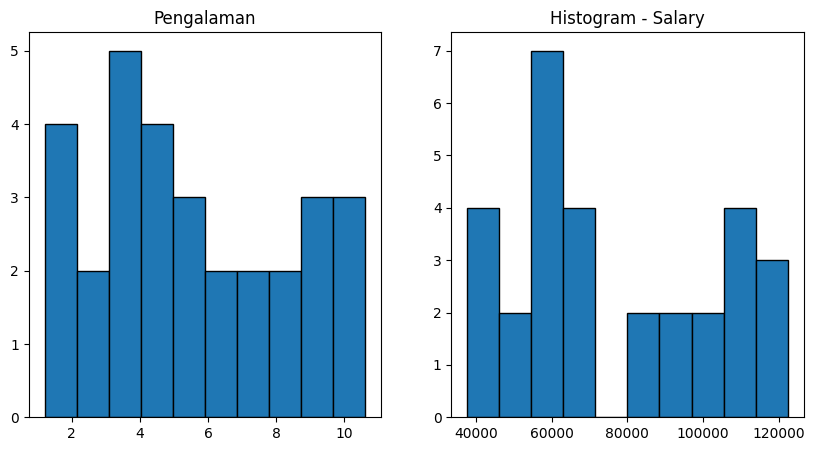

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

#Axes untuk kolom pertama
axes[0].hist(df['YearsExperience'], bins=10, edgecolor='black')
axes[0].set_title('Pengalaman')

#Axes untuk kolom kedua
axes[1].hist(df['Salary'], bins=10, edgecolor='black')
axes[1].set_title('Histogram - Salary')

plt.show()


Kolom YearsExperience dan Salary miring ke kanan atau condong ke kanan.

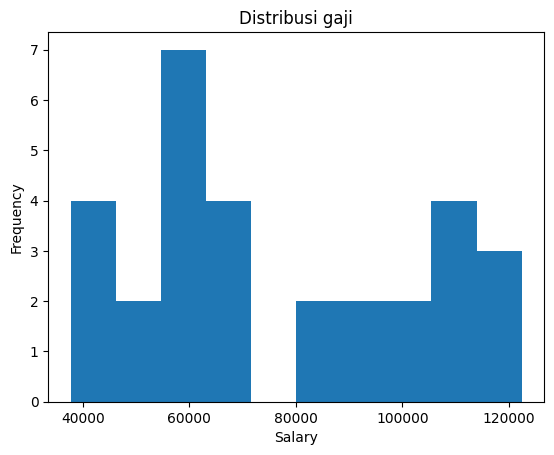

In [13]:
# Histogram distribusi gaji
plt.hist(df['Salary'], bins=10)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribusi gaji')
plt.show()

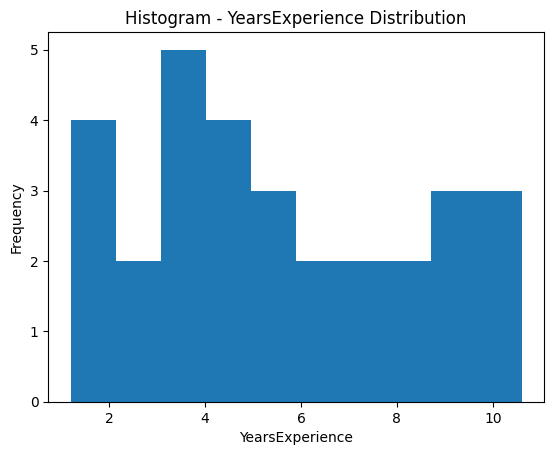

In [14]:
plt.hist(df['YearsExperience'], bins=10)
plt.xlabel('YearsExperience')
plt.ylabel('Frequency')
plt.title('Histogram - YearsExperience Distribution')
plt.show()

# Data Modelling

In [15]:
X = df[['YearsExperience']]
y = df['Salary']

Saya tidak menggunakan pembagian data menjadi data uji dan data latih karena saya hanya ingin mengetahui nilai kemiringan dan intersep, bukan untuk menghasilkan prediksi data baru.

In [16]:

model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [17]:
# Koef
intercept = model.intercept_
slope = model.coef_[0]
# Printing coefficients
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

Intercept: 24848.203966523193
Slope: 9449.962321455077


In [18]:
# Prediksi dengan model
y_pred = model.predict(X)

In [19]:
# Prediksi gaji dalam 10 tahun
model.predict([[10]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([119347.82718107])

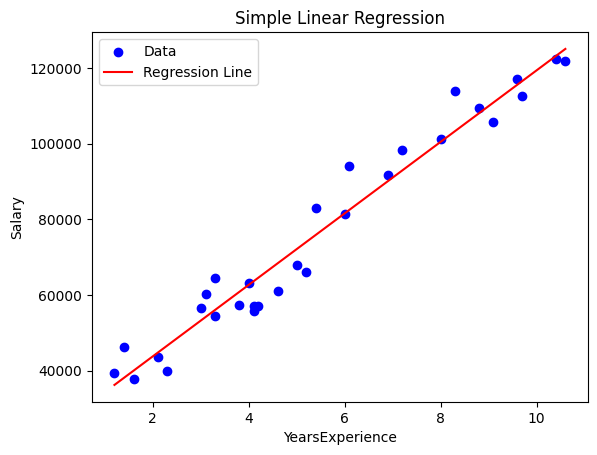

In [20]:
# Visualisasi hasil regresi linear
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

Grafik menunjukkan hubungan linear positif antara pengalaman kerja dan gaji.
Semakin lama pengalaman kerja seseorang, semakin tinggi gajinya.

# Data Evaluation

In [21]:
correlation = df['YearsExperience'].corr(df['Salary'])
print(f"Coefficient of Correlation: {correlation}")
print(f"Coefficient of Determination: {correlation*correlation}")

Coefficient of Correlation: 0.9782416184887599
Coefficient of Determination: 0.9569566641435084


# Conclusion

1. **Koefisien:**  

   - **Intercept (a):** Ini tuh nilai gaji yang diprediksi kalau pengalaman kerja masih **0 tahun**. Dalam contoh ini, angkanya sekitar **24.848**. Jadi kalau ada orang yang baru mulai kerja (0 pengalaman), gajinya diprediksi sekitar segitu.  
   - **Slope (b):** Ini menunjukkan **seberapa besar kenaikan gaji setiap tambahan 1 tahun pengalaman kerja**. Nilainya sekitar **9.449**, artinya **setiap nambah 1 tahun pengalaman, gaji rata-rata naik sekitar 9.449**.  

2. **Korelasi:**  

   - Karena kemiringan garisnya **positif**, berarti ada hubungan positif antara pengalaman kerja dan gaji. **Makin lama kerja, makin tinggi gaji yang bisa didapatkan**.  
